In [282]:
import numpy as np
import json
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import scipy as sp
from skimage.filters import threshold_multiotsu

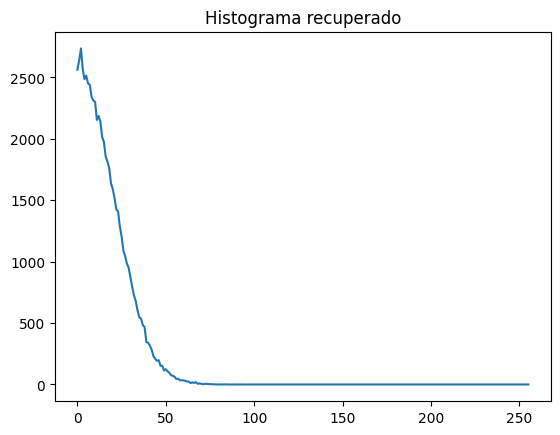

In [283]:
hist_df = pd.read_csv(f"infosaves/hist100.0_100.0_253x263.csv")

plt.plot(hist_df['gray_lvl'], hist_df['hist_value'])
plt.title('Histograma recuperado')
plt.show()

In [284]:
hist_gval = np.array(hist_df['hist_value'])

print(hist_gval)

[2562 2638 2735 2571 2485 2514 2452 2439 2343 2311 2301 2153 2186 2140
 2014 1973 1854 1814 1760 1637 1590 1518 1424 1409 1286 1206 1090 1045
  984  950  873  794  725  679  604  548  536  483  468  345  339  316
  283  231  209  193  198  152  152  113  125  108   95   75   71   62
   45   47   34   34   33   30   24   23   12   17   13   19    6    8
    6    2    5    5    4    2    3    1    1    0    0    1    0    1
    1    0    0    0    0    0    0    0    1    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

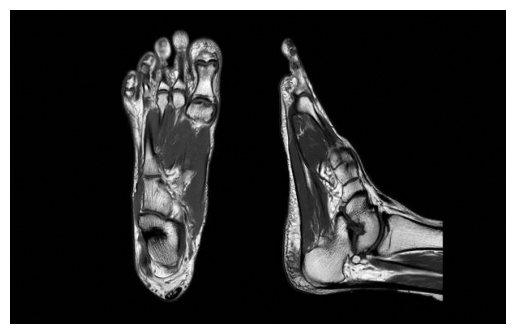

In [285]:
img1 = cv2.imread('PAIByB-2/Pie2-1.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.show()

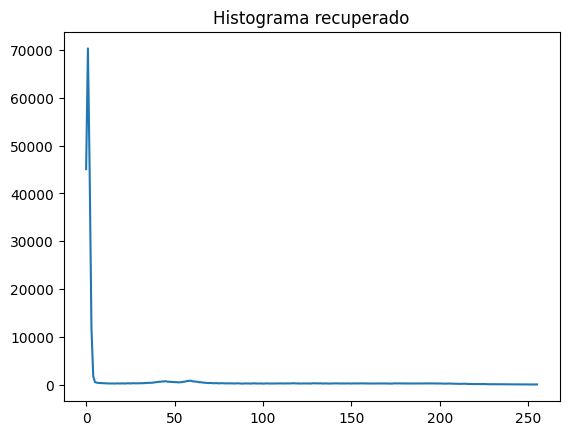

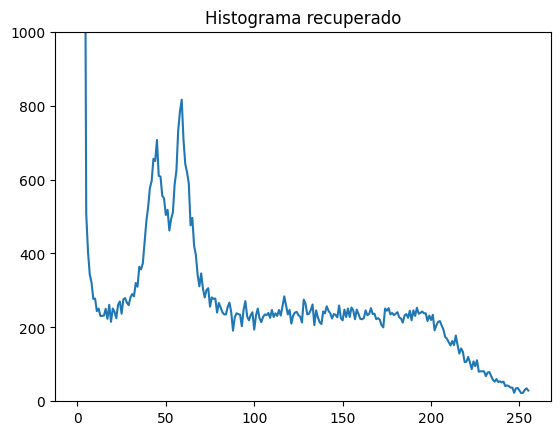

In [286]:
hist, bins = np.histogram(np.ravel(img1),256,[0,256])

plt.plot(np.arange(len(hist)), hist)
plt.title('Histograma recuperado')
plt.show()

plt.plot(np.arange(len(hist)), hist)
plt.title('Histograma recuperado')
plt.ylim((0,1000))
plt.show()

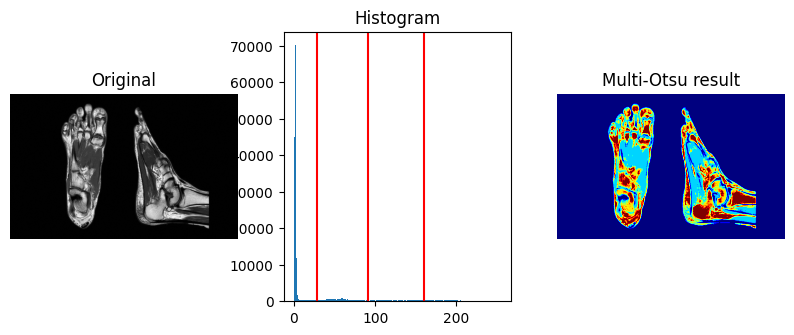

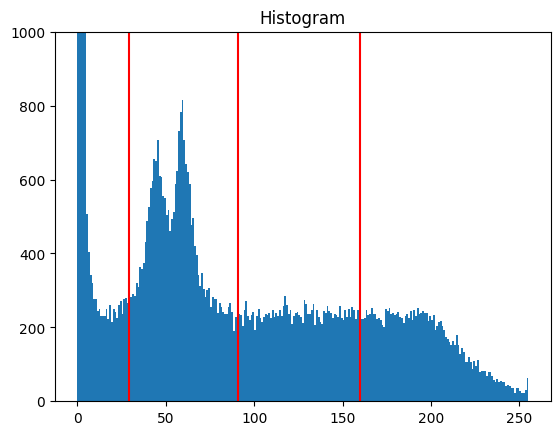

In [287]:
# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(img1,classes=4)

# Using the threshold values, we generate the three regions.
regions = np.digitize(img1, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(img1, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(img1.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

plt.hist(img1.ravel(), bins=255)
plt.title('Histogram')
for thresh in thresholds:
    plt.axvline(thresh, color='r')
plt.ylim((0,1000))
plt.show()

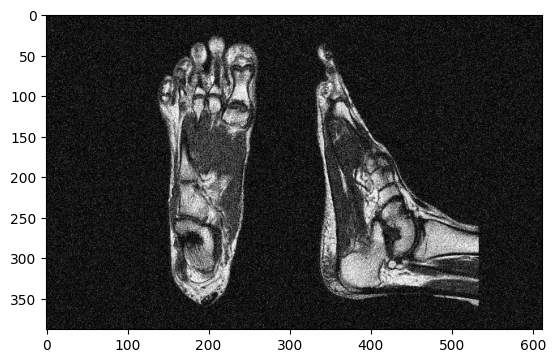

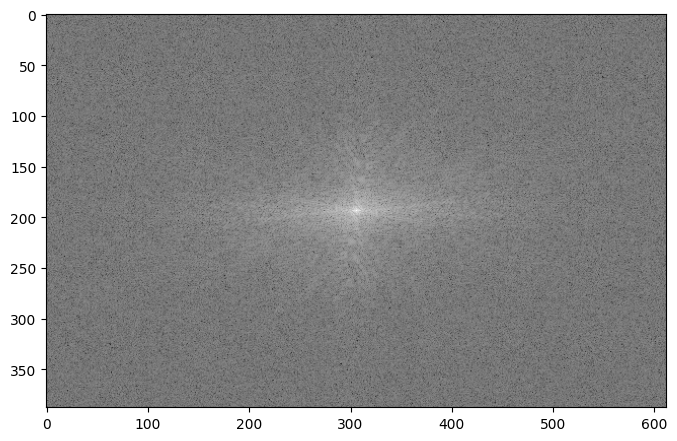

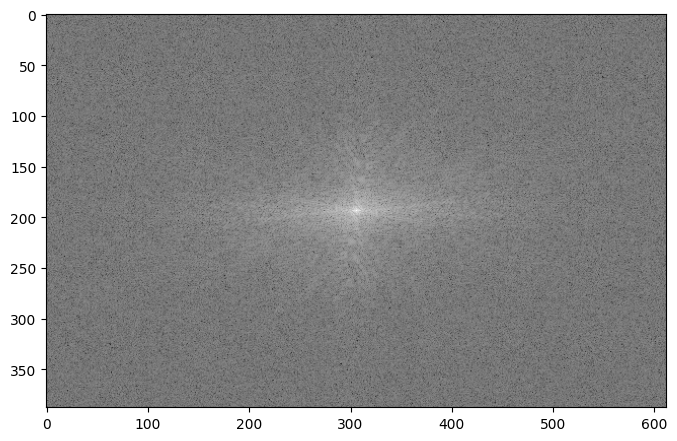

In [288]:
img = cv2.imread('PAIByB-2/Pie2-4.tif',cv2.IMREAD_GRAYSCALE)

plt.imshow(img,cmap="gray")
plt.show()

img_ft = np.fft.fftshift(np.fft.fft2(img))

plt.figure(num=None, figsize=(8, 6))
plt.imshow(np.log(abs(img_ft)), cmap='gray')
plt.show()

img_sp = np.power(img_ft,2)

plt.figure(num=None, figsize=(8, 6))
plt.imshow(np.log(abs(img_sp)), cmap='gray')
plt.show()

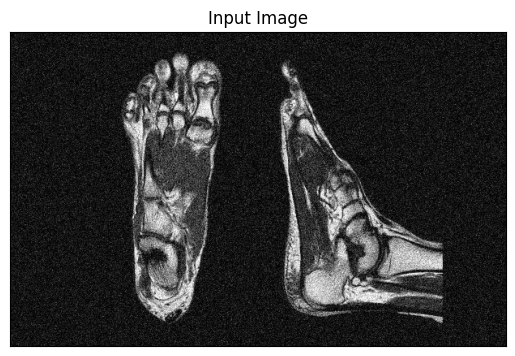

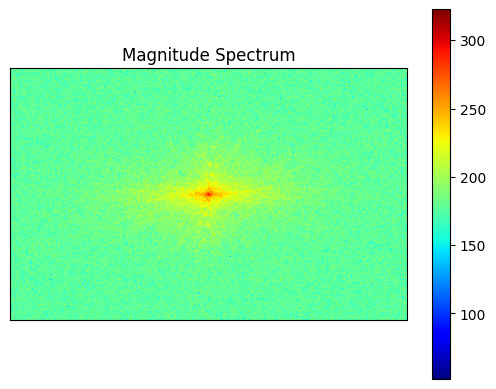

In [289]:
img = cv2.imread('PAIByB-2/Pie2-4.tif',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()


plt.imshow(magnitude_spectrum, cmap='jet')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.colorbar()
plt.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_19012\589314657.py:10: UserWarning: Adding colorbar to a different Figure <Figure size 1000x700 with 2 Axes> than <Figure size 1000x350 with 3 Axes> which fig.colorbar is called on.
  fig.colorbar(surf)


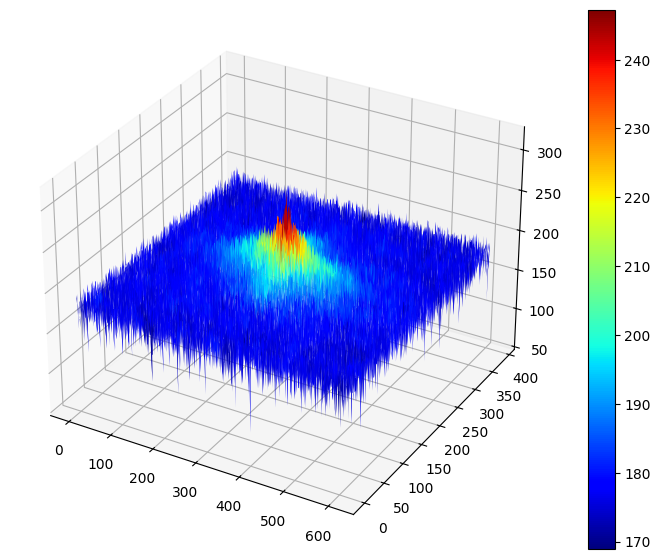

In [290]:
alto, ancho = np.shape(magnitude_spectrum)

X = np.arange(ancho)
Y = np.arange(alto)
X,Y = np.meshgrid(X,Y)
Z = magnitude_spectrum

ax = plt.figure(figsize=(10,7)).add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap="jet")
fig.colorbar(surf)
plt.show()

In [291]:
Z_new = Z

Z_new[Z_new < 190] = 1
Z_new[Z_new > 300] = 1


print(np.shape(Z_new))

(388, 612)


C:\Users\lucas\AppData\Local\Temp\ipykernel_19012\361628194.py:3: UserWarning: Adding colorbar to a different Figure <Figure size 1000x700 with 2 Axes> than <Figure size 1000x350 with 3 Axes> which fig.colorbar is called on.
  fig.colorbar(surf)


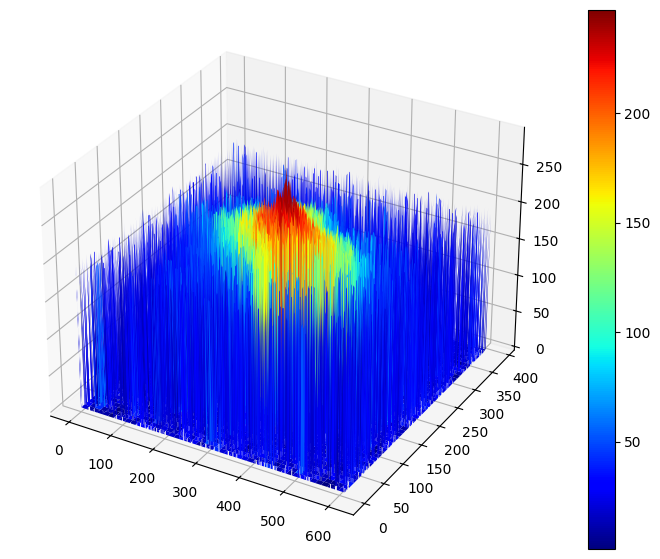

In [292]:
ax = plt.figure(figsize=(10,7)).add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z_new, cmap="jet")
fig.colorbar(surf)
plt.show()

In [293]:
mask = Z_new
mask[mask != 1] = 0

C:\Users\lucas\AppData\Local\Temp\ipykernel_19012\3477900901.py:3: UserWarning: Adding colorbar to a different Figure <Figure size 1000x700 with 2 Axes> than <Figure size 1000x350 with 3 Axes> which fig.colorbar is called on.
  fig.colorbar(surf)


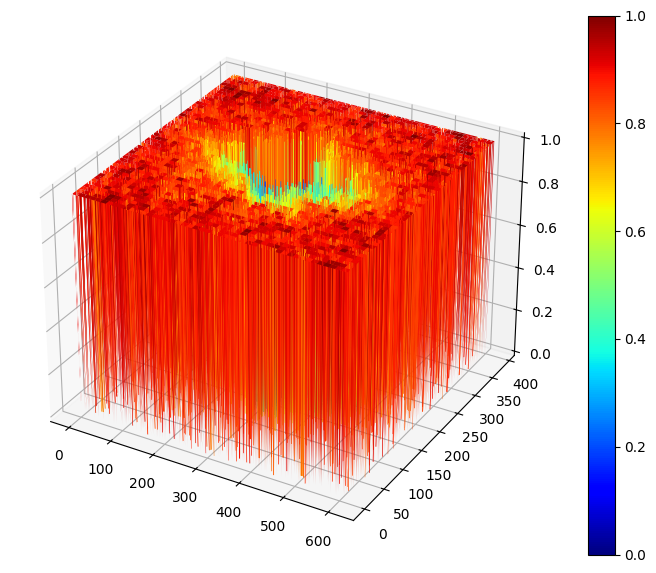

In [294]:
ax = plt.figure(figsize=(10,7)).add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, mask, cmap="jet")
fig.colorbar(surf)
plt.show()

In [295]:
def apply_filter(image, H):
    F = np.fft.fft2(image)          # Compute the 2D Fourier Transform of the image
    F_shifted = np.fft.fftshift(F)  # Shift the zero frequency component to the center
    F_filtered = F_shifted * H      # Apply the high-pass filter in the frequency domain
    F_ishifted = np.fft.ifftshift(F_filtered)  # Shift back the zero frequency component
    filtered_image = np.fft.ifft2(F_ishifted)  # Inverse Fourier Transform to spatial domain
    return np.abs(filtered_image)   # Return the magnitude of the filtered image

In [296]:
noise = apply_filter(img, mask)

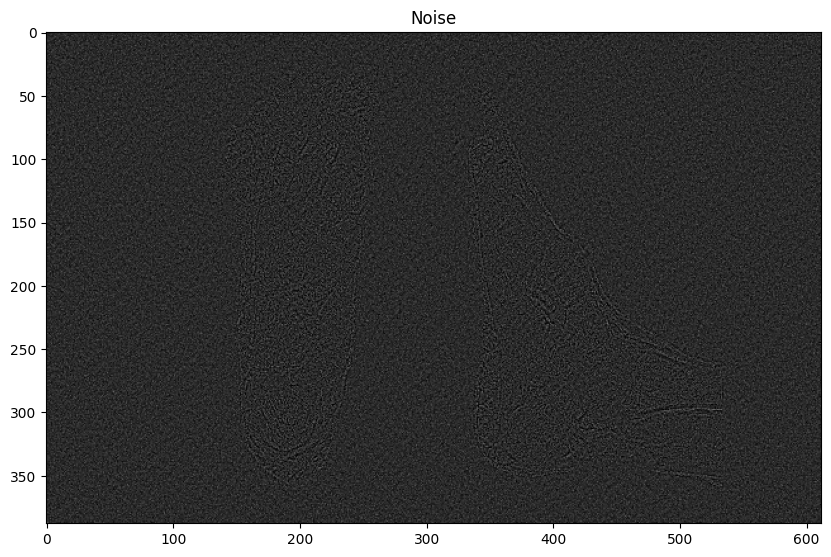

In [297]:
plt.figure(figsize=(10,10))
plt.imshow(noise, vmin=0, vmax=255, cmap = 'gray')
plt.title('Noise')
plt.show()

225


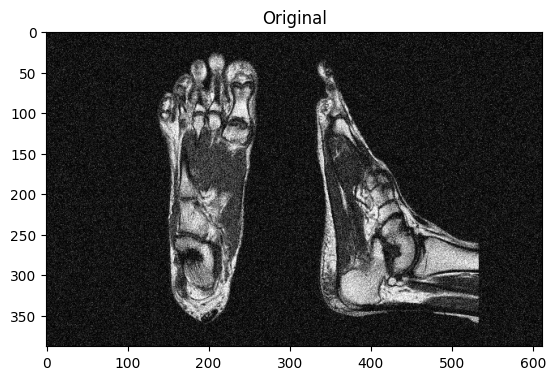

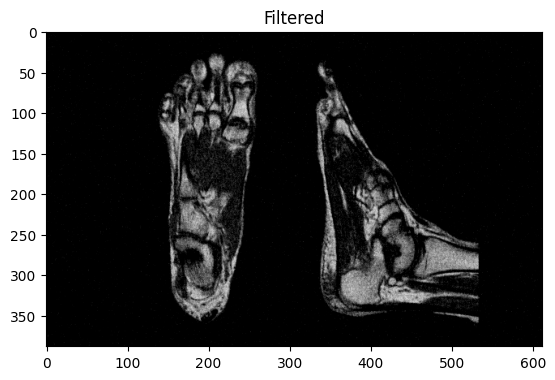

In [298]:
filtered_img = img - noise

dummy1 = filtered_img

dummy1[dummy1 < 0] = 0

dummy2 = np.uint8(dummy1)

print(np.max(dummy2))

plt.imshow(img, vmin=0, vmax=255, cmap = 'gray')
plt.title('Original')
plt.show()

plt.imshow(dummy2, vmin=0, vmax=255, cmap = 'gray')
plt.title('Filtered')
plt.show()